<a href="https://colab.research.google.com/github/trivedisunita/MLLearning/blob/main/Predicting_Churn_For_Bank_Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PART-1 Data PreProcessing



#Section-1 Importing Library


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data set

In [ ]:
data = pd.read_csv(r'/dataset/Churn_Modelling.csv')

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Step-2  Data PreProcessing 
 


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.select_dtypes(include=['int64','float64']).columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
data.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [ ]:
data.shape

(10000, 14)

In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#Check Missing value


In [ ]:
data.isnull().values.any()

False

In [ ]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#Encode the Categorial data
 one Hot encoding

In [ ]:
data.select_dtypes(include='object').columns
                  

Index(['Surname', 'Geography', 'Gender'], dtype='object')

As the surname,rownumber, customerid is not affect to predict the churn so remove this column.

In [ ]:
data= data.drop(columns=['Surname','RowNumber','CustomerId'])


In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.select_dtypes(include='object').columns


Index(['Geography', 'Gender'], dtype='object')

Get the Unique value for categorial data

In [ ]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
data=pd.get_dummies(data=data,drop_first=True)

In [ ]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


# CountPlot

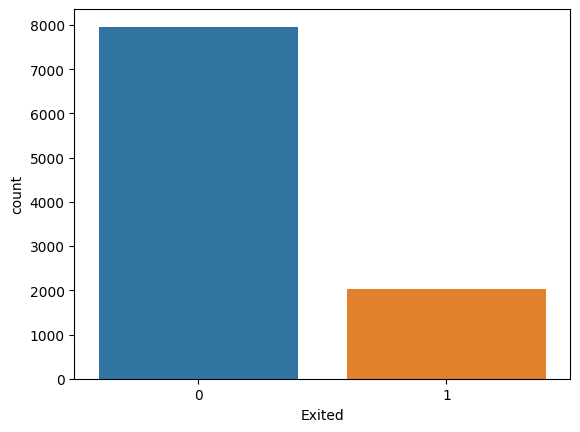

In [ ]:
sns.countplot(data=data, x= 'Exited')
plt.show()

customer who stays with bank


In [ ]:
(data.Exited==0).sum()

7963

customer who exited bank

In [ ]:
(data.Exited==1).sum()

2037

# Correaltio Matrix with dataset

In [ ]:
 data_2 = data.drop(columns='Exited')

In [ ]:
data_2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


<Axes: title={'center': 'Correlated with Exited'}>

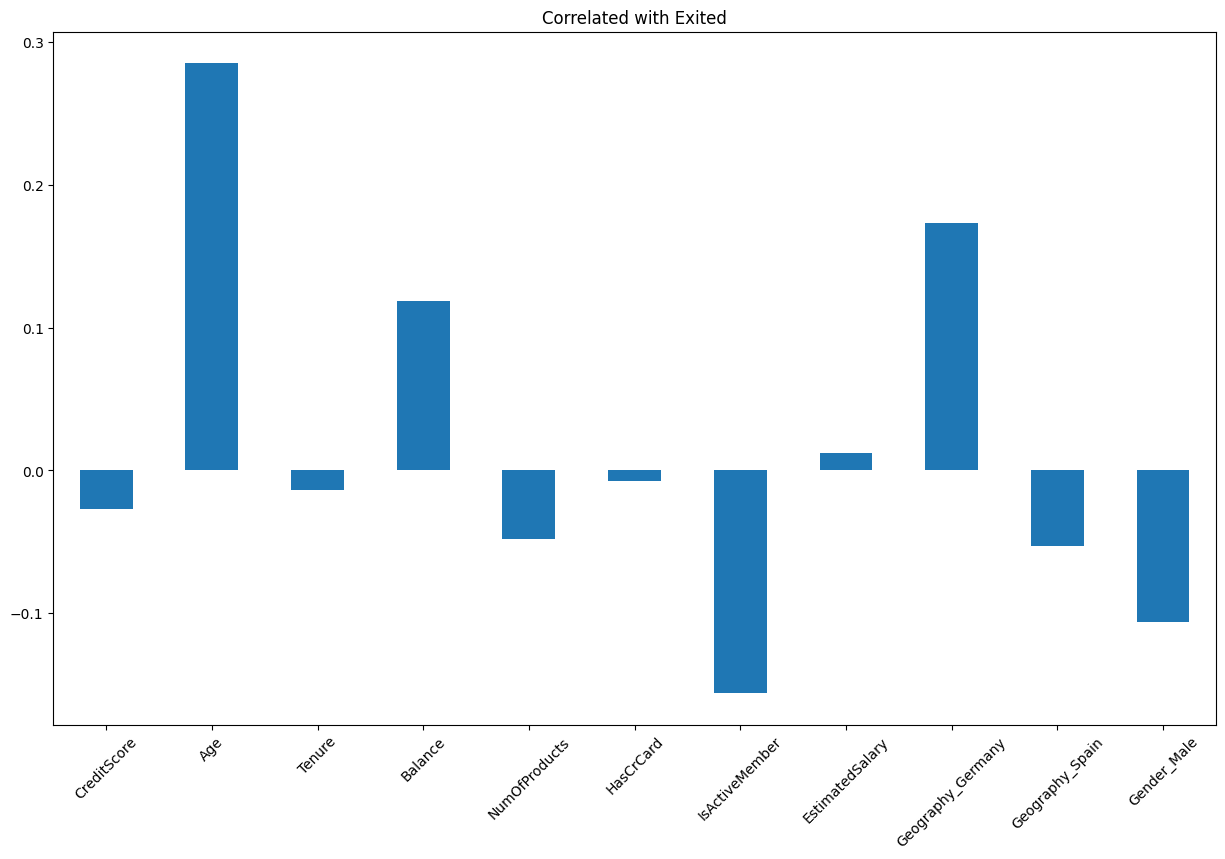

In [ ]:
data_2.corrwith(data['Exited']).plot.bar(figsize=(15,9), title='Correlated with Exited',rot =45)

In [ ]:
corr = data.corr()

<Axes: >

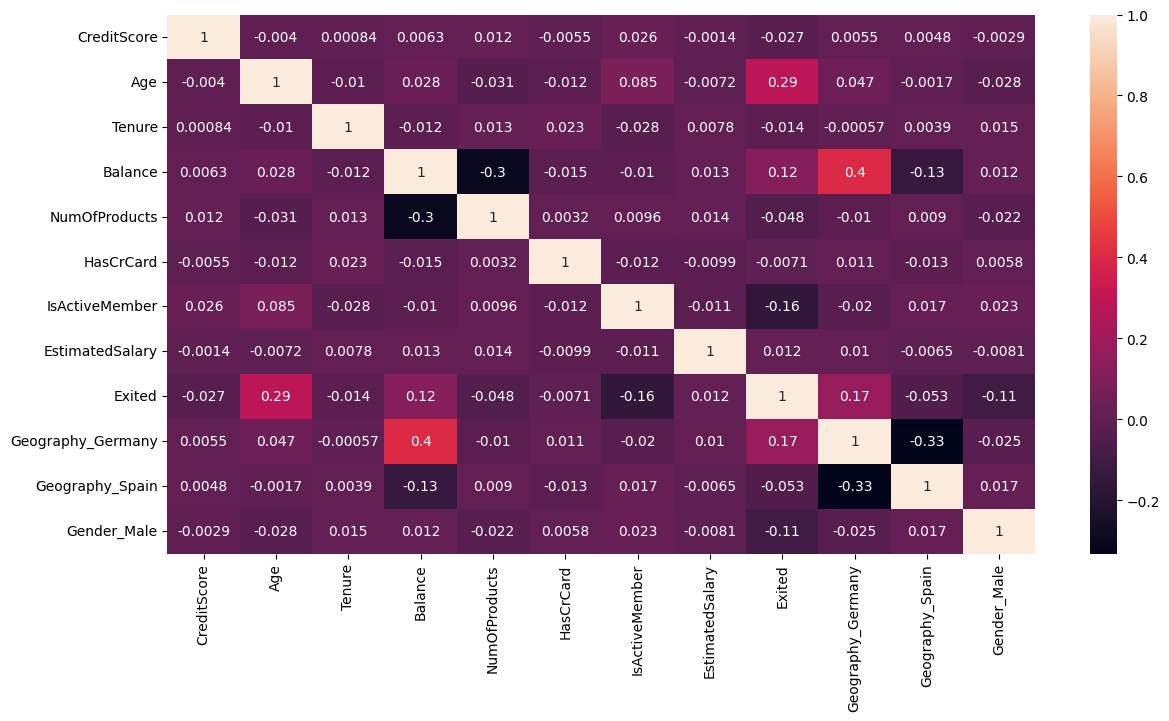

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(corr, annot=True)

# Split the Dataset

In [ ]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Idepenedent variable/Target Variable


In [ ]:
x  = data.drop(columns = 'Exited')

In [ ]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


Dependent and Trget Variable/Predictor

In [ ]:
y = data['Exited']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=34)

In [ ]:
x_train.shape


(8000, 11)

In [ ]:
x_test.shape

(2000, 11)

In [ ]:
y_train.shape

(8000,)

In [ ]:
y_test.shape

(2000,)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()


In [ ]:
x_train = scaler.fit_transform(x_train)

In [ ]:
x_train

array([[-1.51737124,  0.68722156, -1.04075851, ..., -0.57292385,
         1.73032049, -1.09969743],
       [ 0.09062759,  2.69430085, -0.34913845, ..., -0.57292385,
        -0.57792762,  0.90934104],
       [-1.79747427,  1.83412401,  1.03410167, ...,  1.74543266,
        -0.57792762, -1.09969743],
       ...,
       [-0.79117822, -0.45968089, -0.00332842, ..., -0.57292385,
         1.73032049,  0.90934104],
       [-0.55257194,  0.59164636,  0.68829164, ..., -0.57292385,
        -0.57792762,  0.90934104],
       [ 0.04913085,  0.11377033, -1.73237857, ...,  1.74543266,
        -0.57792762, -1.09969743]])

In [ ]:
x_test = scaler.transform(x_test)

In [ ]:
x_test

array([[-0.50070101, -0.6508313 ,  0.68829164, ...,  1.74543266,
        -0.57792762,  0.90934104],
       [-0.85342334,  0.49607115,  0.68829164, ..., -0.57292385,
        -0.57792762, -1.09969743],
       [-0.49032683, -0.36410569, -1.38656854, ...,  1.74543266,
        -0.57792762,  0.90934104],
       ...,
       [ 0.2358662 ,  1.92969922, -1.73237857, ..., -0.57292385,
        -0.57792762,  0.90934104],
       [ 0.4537241 ,  0.30492074, -0.69494848, ..., -0.57292385,
        -0.57792762,  0.90934104],
       [-0.38658497, -0.84198171,  1.3799117 , ..., -0.57292385,
         1.73032049,  0.90934104]])

# Building the Model

## 1.Logistic Regression

---



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
model_1 = lr.fit(x_train,y_train)
model_1

LogisticRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
                            

In [ ]:
acc = accuracy_score(y_test,y_pred)
pre_score = precision_score(y_test, y_pred)
re_score = recall_score(y_test,y_pred)
f1_sco = f1_score(y_test,y_pred)

In [ ]:
results = pd.DataFrame([['Logistic Regression', acc, pre_score,re_score,f1_sco]],
                       columns=['Model', 'Accuracy','Precision','Recall_sc','F1_score'])


In [ ]:
results

,Model,Accuracy,Precision,Recall_sc,F1_score
0,Logistic Regression,0.8,0.607595,0.221198,0.324324


In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1504,   62],
       [ 338,   96]])

#Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=lr, X=x_train,y=y_train,cv=10)

In [ ]:
accurecy = accuracies.mean()*100
standard_dev = accuracies.std()*100


In [ ]:
print(f'Accurecy is {accurecy} %')
print(f'Standard Deviation is {standard_dev}%')

Accurecy is 81.3875 %
Standard Deviation is 1.1297815054248324%


# 2. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
model_2 = rfc.fit(x_train,y_train)
model_2

RandomForestClassifier()

In [ ]:
y_pred = rfc.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [ ]:
acc = accuracy_score(y_test,y_pred)
pre_score = precision_score(y_test, y_pred)
re_score = recall_score(y_test,y_pred)
f1_sco = f1_score(y_test,y_pred)

In [ ]:
result_2 = pd.DataFrame([['Random Forest', acc,pre_score,re_score,f1_sco]],
                        columns=['Model', 'Accuracy','Precision','Recall_sc','F1_score'])
result_2

,Model,Accuracy,Precision,Recall_sc,F1_score
0,Random Forest,0.855,0.78125,0.460829,0.57971


In [ ]:
cm2 = confusion_matrix(y_test,y_pred)
cm2


array([[1510,   56],
       [ 234,  200]])

In [ ]:
result_2 = result_2.append(results, ignore_index=True)
result_2

<ipython-input-110-11f91a4f9cf2>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_2 = result_2.append(results, ignore_index=True)


,Model,Accuracy,Precision,Recall_sc,F1_score
0,Random Forest,0.855,0.781250,0.460829,0.579710
1,Logistic Regression,0.800,0.607595,0.221198,0.324324


#Cross validation for Random Forest

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
accuracies = cross_val_score(estimator=rfc, X=x_train,y= y_train, cv=10)
accurecy = accuracies.mean()*100
standard_dev = accuracies.std()*100

print(f'Accurecy is {accurecy} %')
print(f'Standard Deviation is {standard_dev}%')

Accurecy is 86.4 %
Standard Deviation is 0.9467048114380757%


By reviwing the both model Random forest is better model
we are finalizing Random forest

#Predict a Single Obdervation

In [ ]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
single_obs = [[630, 30, 2, 25000.00, 1, 0, 1, 20000.00, 0,1,0]]
single_obs

[[630, 30, 2, 25000.0, 1, 0, 1, 20000.0, 0, 1, 0]]

In [ ]:
rfc.predict(scaler.transform(single_obs))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

so the customer with the details given in single_obs stays with bank.